<h1 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Predicting Stroke With Machine Learning</h1>

<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Introduction](#1)
    * [1.1 Problem Statement](#1.1)
    * [1.2 Questions we want to answer](#1.2)
    * [1.3 Libraries](#1.3)
* [2. Data Preprocessing/EDA](#2)
    * [2.1 Data Loading](#2.1)
    * [2.2 Data Cleaning and Imputation](#2.2)
    * [2.3 Visualizations](#2.3)
    * [2.4 Encoding](#2.4)
    * [2.5 Train Test Split](#2.5)
    * [2.6 Applying SMOTE Technique for Imbalanced Classes](#2.6)
    * [2.7 Scaling](#2.7)
* [3. Modeling](#3)
    * [3.1 Individual Models Without Hyperparameter Tuning](#3.1)
    * [3.2 Summary Table of Performance](#3.2)
    * [3.3 Hyperparameter Tuning](#3.3)
* [4. Final Models](#4)
    * [4.1 Model for Highest Accuracy](#4.1)
    * [4.2 Models for Highest Recall](#4.2)
* [5. Summary](#5)

<a id = '1'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Introduction</h1>

Every year, about 800,000 people in the United States have a stroke, and about 75% of these are first time strokes. In this notebook, will use visualizations to explore the relationships between stroke and various health and sociodemographic indicators and to use these indicators to build a machine learning model that can predict whether or not someone as at risk for stroke. 

<a id = '1.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Problem Statement</h3>

To visualize the relationships between various health and sociodemographic indicators and stroke, and to build a model that predicts whether or not someone is at risk for stroke.

<a id = '1.2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Extra Questions We Want to Explore</h3>

Which features are most influential on the models we build:
1. Does workplace environment have a big impact on chance of having a stroke?
2. Does marital status have a big impact on stroke?
3. How influential is smoking status on the models?
3. Do the sociodemographic features even have much influence on the outcomes of the models or is it mainly health features that have any predictive power?

<a id = '1.3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Importing Libraries</h3>

In [1069]:
import pandas as pd
import requests
import math
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt, patches
import seaborn as sns
from sklearn.inspection import permutation_importance
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pywaffle import Waffle

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, roc_curve, recall_score, f1_score, classification_report, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve



<a id = '2'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Data Preprocessing/EDA</h1>

<a id = '2.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Loading the Data</h3>

In [1070]:
stroke_data = pd.read_csv('stroke prediction/healthcare-dataset-stroke-data.csv')

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Definition and Understanding the Data</h3>

In [1071]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [1072]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [1073]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1074]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Cleaning and Imputation</h3>

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Finding the Number of Missing Values by Column</h3>

In [1075]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Imputation</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Imputation of missing BMI data with BMI based on age</h3>

In [1076]:
bmi_tables = pd.read_html('https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/')
len(bmi_tables)

4

In [1077]:
child_bmi = bmi_tables[0]
adult_bmi = bmi_tables[1]
print(child_bmi)

           0                    1           2                    3  \
0  Age Range  25th Percentile BMI  Median BMI  75th Percentile BMI   
1        2-3                 15.6        16.3                 17.2   
2        4-5                 15.3        16.1                 17.3   
3        6-7                 15.0        16.1                 18.4   
4        8-9                 15.8        17.3                 19.8   
5      10-11                 16.8        19.2                 22.4   
6      12-13                 18.2        20.6                 25.1   
7      14-15                 19.4        22.0                 25.6   
8      16-17                 21.2        24.1                 27.8   

             4  
0  Average BMI  
1         16.5  
2         16.5  
3         17.2  
4         18.3  
5         20.2  
6         22.0  
7         23.4  
8         25.3  


In [1078]:
child_bmi.columns = child_bmi.iloc[0]
child_bmi = child_bmi[1:]
adult_bmi.columns = adult_bmi.iloc[0]
adult_bmi = adult_bmi[1:]

In [1079]:
child_bmi = child_bmi.set_index('Age Range')
adult_bmi = adult_bmi.set_index('Age Range')

In [1080]:
child_bmi = child_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)
adult_bmi = adult_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)

In [1081]:
median_bmi = child_bmi.append(adult_bmi)

In [1082]:
print(median_bmi)

0         Median BMI
Age Range           
2-3             16.3
4-5             16.1
6-7             16.1
8-9             17.3
10-11           19.2
12-13           20.6
14-15           22.0
16-17           24.1
18-24           25.5
25-29           26.4
30-34           28.1
35-39           29.0
40-44           29.1
45-49           28.6
50-54           29.1
55-59           29.2
60-64           28.9
65-69           29.0
70-74           28.6
75+             27.5


In [1083]:
def fill_bmi(arr):
    for index, row in arr.iterrows():
        if pd.isna(row['bmi']):
            if row['age'] <= 3:
                arr.iloc[index, 9] = median_bmi.iloc[0][0]
            elif row['age'] >= 4 and row['age'] <= 5:
                arr.iloc[index, 9] = median_bmi.iloc[1][0]
            elif row['age'] >= 6 and row['age'] <= 7:
                arr.iloc[index, 9] = median_bmi.iloc[2][0]
            elif row['age'] >= 8 and row['age'] <= 9:
                arr.iloc[index, 9] = median_bmi.iloc[3][0]
            elif row['age'] >= 10 and row['age'] <= 11:
                arr.iloc[index, 9] = median_bmi.iloc[4][0]
            elif row['age'] >= 12 and row['age'] <= 13:
                arr.iloc[index, 9] = median_bmi.iloc[5][0]
            elif row['age'] >= 14 and row['age'] <= 15:
                arr.iloc[index, 9] = median_bmi.iloc[6][0]
            elif row['age'] >= 16 and row['age'] <= 17:
                arr.iloc[index, 9] = median_bmi.iloc[7][0]
            elif row['age'] >= 18 and row['age'] <= 24:
                arr.iloc[index, 9] = median_bmi.iloc[8][0]
            elif row['age'] >= 25 and row['age'] <= 29:
                arr.iloc[index, 9] = median_bmi.iloc[9][0]
            elif row['age'] >= 30 and row['age'] <= 34:
                arr.iloc[index, 9] = median_bmi.iloc[10][0]
            elif row['age'] >= 35 and row['age'] <= 39:
                arr.iloc[index, 9] = median_bmi.iloc[11][0]
            elif row['age'] >= 40 and row['age'] <= 44:
                arr.iloc[index, 9] = median_bmi.iloc[12][0]
            elif row['age'] >= 45 and row['age'] <= 49:
                arr.iloc[index, 9] = median_bmi.iloc[13][0]
            elif row['age'] >= 50 and row['age'] <= 54:
                arr.iloc[index, 9] = median_bmi.iloc[14][0]
            elif row['age'] >= 55 and row['age'] <= 59:
                arr.iloc[index, 9] = median_bmi.iloc[15][0]
            elif row['age'] >= 60 and row['age'] <= 64:
                arr.iloc[index, 9] = median_bmi.iloc[16][0]
            elif row['age'] >= 65 and row['age'] <= 69:
                arr.iloc[index, 9] = median_bmi.iloc[17][0]
            elif row['age'] >= 70 and row['age'] <= 74:
                arr.iloc[index, 9] = median_bmi.iloc[18][0]
            elif row['age'] >= 75:
                arr.iloc[index, 9] = median_bmi.iloc[19][0]

In [1084]:
fill_bmi(stroke_data)

In [1085]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


Check for missing values again

In [1086]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


Let's set the index to the ID column

In [1087]:
stroke_data = stroke_data.set_index('id')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Find Duplicates</h3>

In [1088]:
duplicates = stroke_data[stroke_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Convert BMI to float

In [1089]:
stroke_data['bmi'] = stroke_data['bmi'].astype(float)

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Find Extreme Outliers</h3>

In [1090]:
z = np.abs(stats.zscore(stroke_data[['age', 'avg_glucose_level', 'bmi']]))
print(np.where(z > 3))

(array([  33,   45,  113,  122,  123,  135,  193,  196,  220,  243,  256,
        258,  270,  303,  330,  333,  358,  386,  430,  466,  544,  552,
        637,  662,  672,  715,  755,  761,  785,  805,  928, 1061, 1067,
       1070, 1077, 1113, 1207, 1304, 1322, 1384, 1436, 1453, 1529, 1532,
       1559, 1564, 1584, 1595, 1626, 1660, 1898, 2071, 2081, 2128, 2136,
       2182, 2203, 2293, 2330, 2441, 2462, 2494, 2545, 2555, 2567, 2633,
       2693, 2751, 2764, 2815, 2840, 3060, 3088, 3215, 3243, 3342, 3393,
       3508, 3588, 3606, 3688, 3702, 3825, 3909, 3931, 3980, 4048, 4154,
       4188, 4209, 4225, 4249, 4283, 4351, 4356, 4407, 4447, 4457, 4470,
       4475, 4598, 4711, 4838, 4906, 4909, 4952, 4983, 5034], dtype=int64), array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2

In [1091]:
stroke_data[stroke_data['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


While having a BMI above 70 is certainly extreme, it is reasonable to assume these are real and not errors. Thus, we will leave them in. 

In [1092]:
stroke_data[stroke_data['avg_glucose_level'] > 300]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [1093]:
mean_bmi = stroke_data['bmi'].mean()
std_bmi = stroke_data['bmi'].std()
cut_off = std_bmi * 3
lower, upper = mean_bmi - cut_off, mean_bmi + cut_off

stroke_data[np.abs(stroke_data['bmi']) > upper]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
53144,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0
1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
3130,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0


We will leave in the outliers. BMI and glucose levels seem to have a lot of variability/spread in the general population.

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Clean and convert categorical features</h3>

In [1094]:
stroke_data.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
51676,Female,Yes,Self-employed,Rural,never smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
18234,Female,Yes,Private,Urban,never smoked
44873,Female,Yes,Self-employed,Urban,never smoked
19723,Female,Yes,Self-employed,Rural,never smoked


Find unique categorical values

In [1095]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since we have just one "other", we can safely drop this so that the gender column is clean. 

In [1096]:
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace = True)

In [1097]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [1098]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [1099]:
stroke_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [1100]:
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [1101]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<a id = '2.3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Visualization</h3>

In [1102]:
stroke_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.332060,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.159937,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038370,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167550,0.131991
bmi,0.332060,0.159937,0.038370,0.167550,1.000000,0.036040
stroke,0.245239,0.127891,0.134905,0.131991,0.036040,1.000000


<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Correlation Heatmap</h3>

<AxesSubplot:>

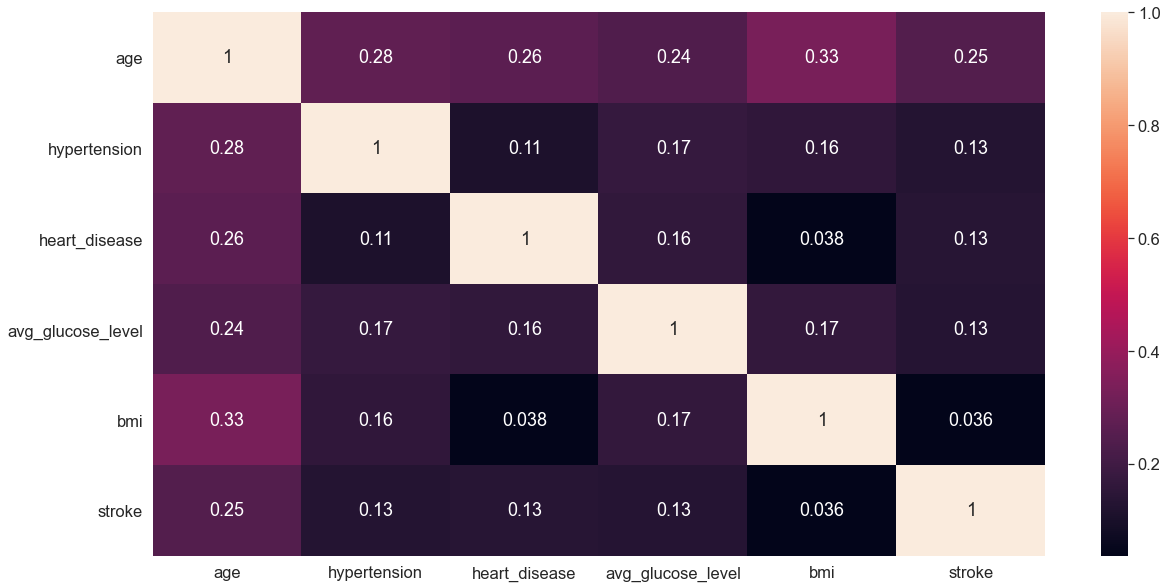

In [1103]:
plt.figure(figsize=(20,10))
sns.heatmap(stroke_data.corr(), annot=True)

The strongest correlation with stroke is age. This is not surprising, as age is a well known risk factor for stroke. Other relatively strong correlations are with heart disease, hypertension and average glucose level. Surprisingly, bmi had a lower correlation than many others.

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Stroke vs non-stroke distributions of continuous variables</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Age</h3>

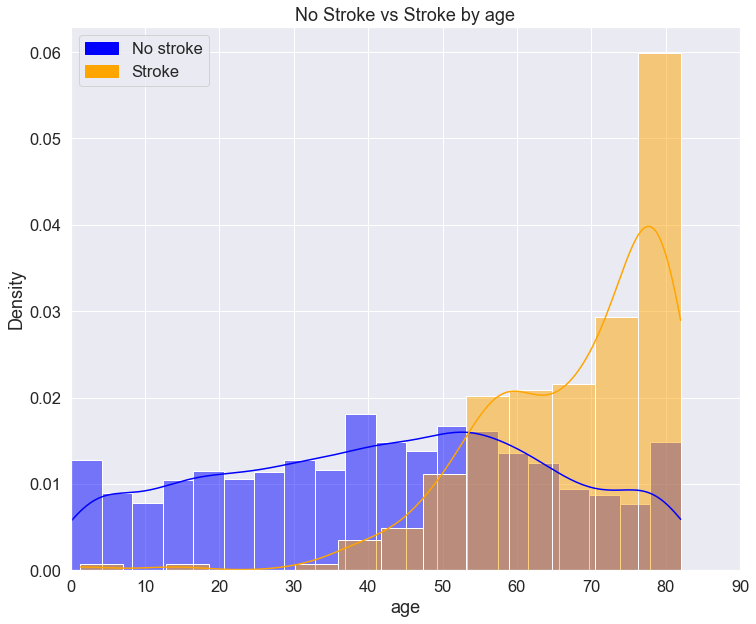

In [1104]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['age'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['age'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by age')
plt.xlim([0,90])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

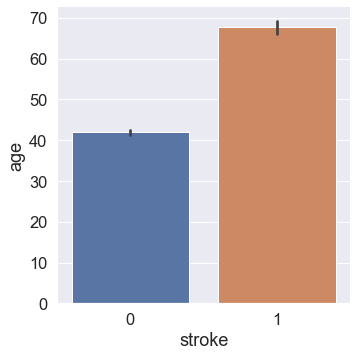

In [1105]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='age', data=stroke_data, kind='bar')

Age is already a well established risk factor for stroke, and we can clearly see here these probably come from different distributions. 

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Glucose Level</h3>

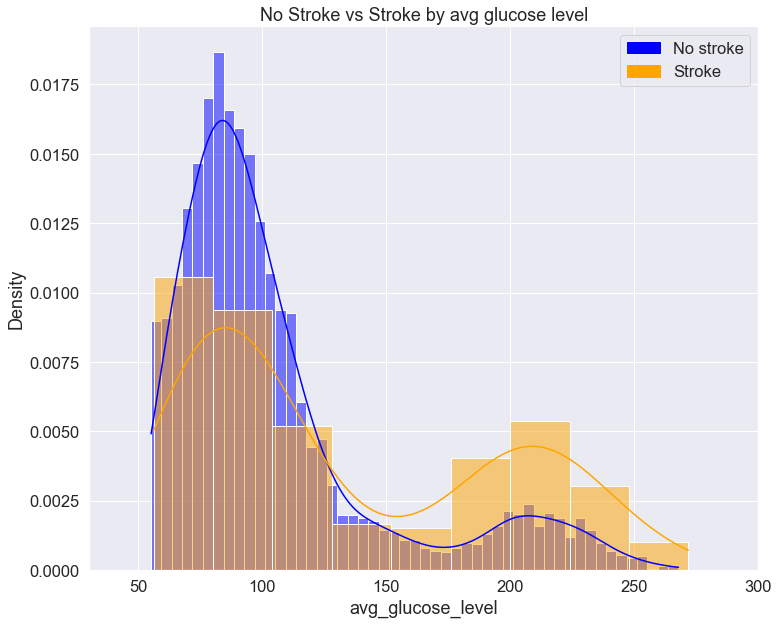

In [1106]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by avg glucose level')
plt.xlim([30,300])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

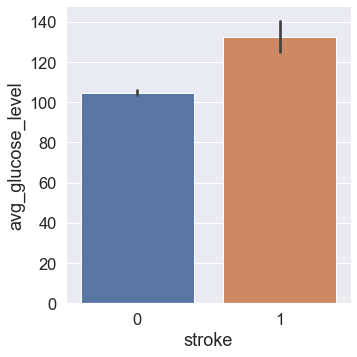

In [1107]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='avg_glucose_level', data=stroke_data, kind='bar')

   These appear to be from different disributions

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">BMI</h3>

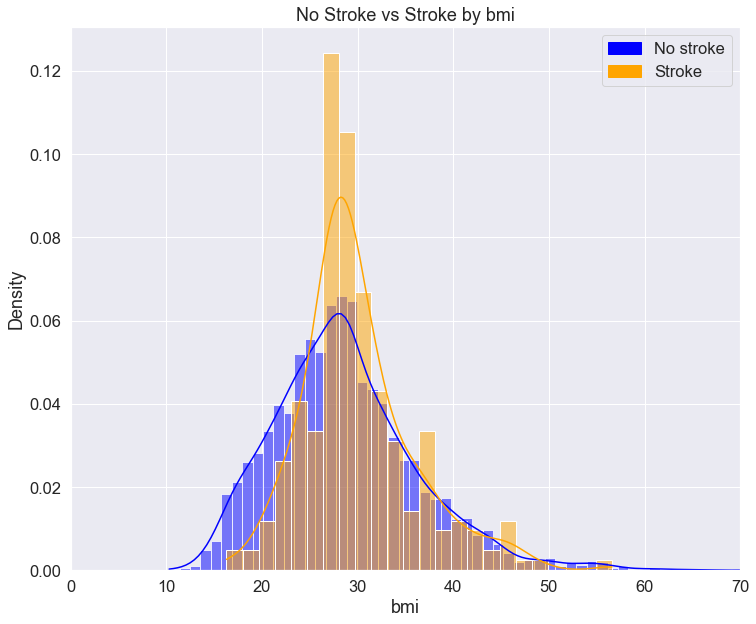

In [1108]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['bmi'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['bmi'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by bmi')
plt.xlim([0,70])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

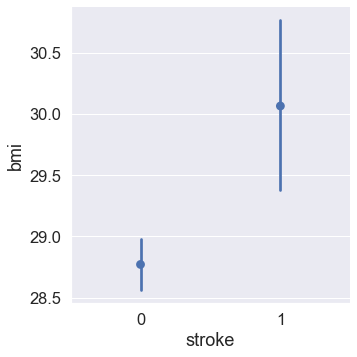

In [1109]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='bmi', data=stroke_data, kind='point', join=False)

These seem to be from different distributions

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">The discrete variables</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Gender</h3>

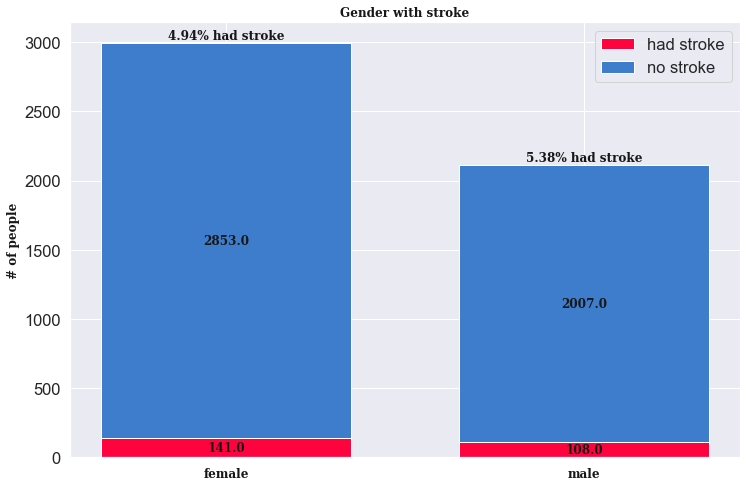

In [1110]:
stroke = stroke_data[stroke_data['stroke'] == 1]['gender'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['gender'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['female', 'male'], font='Serif', weight='bold', size=12, color='#171717')
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values of each bar.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos+50, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})

plt.ylabel('# of people', font='Serif', weight='bold', size=12, color='#171717')
plt.title('Gender with stroke',font='Serif', weight='bold', size=12, color='#171717')
plt.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Hypertension</h3>

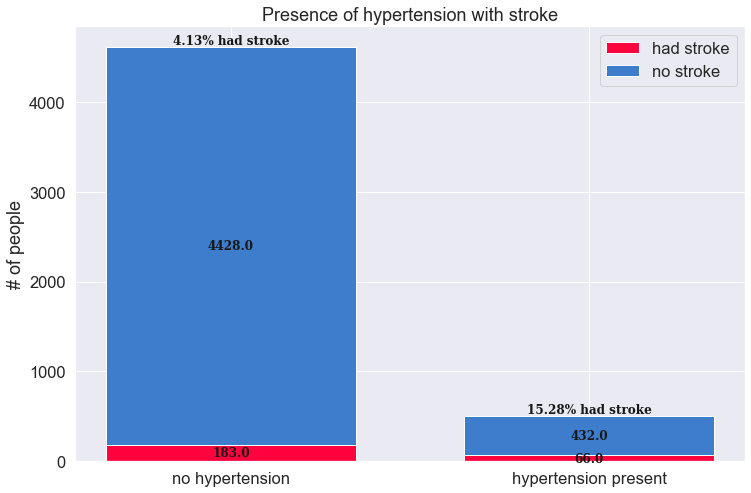

In [1111]:
stroke = stroke_data[stroke_data['stroke'] == 1]['hypertension'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['hypertension'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no hypertension', 'hypertension present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Presence of hypertension with stroke')
plt.legend()

A pretty sizable difference, but with low numbers it may not be significant.

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Heart Disease</h3>

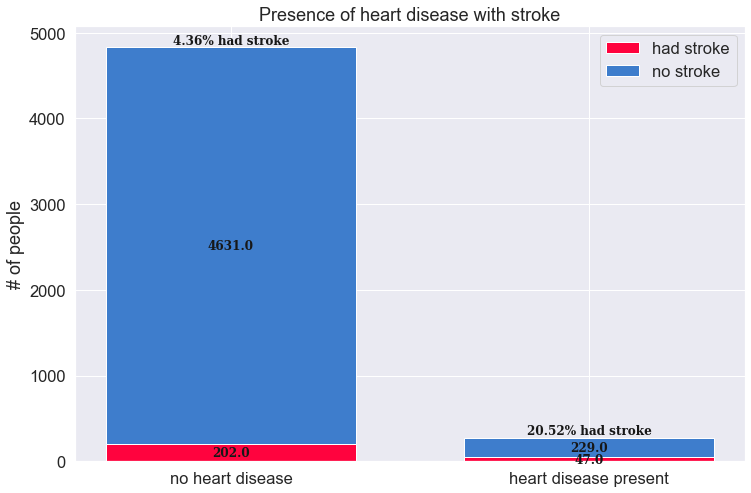

In [1112]:
stroke = stroke_data[stroke_data['stroke'] == 1]['heart_disease'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['heart_disease'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no heart disease', 'heart disease present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Presence of heart disease with stroke')
plt.legend()

A pretty sizable difference, but again low numbers may not reveal a significant difference.

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Marriage</h3>

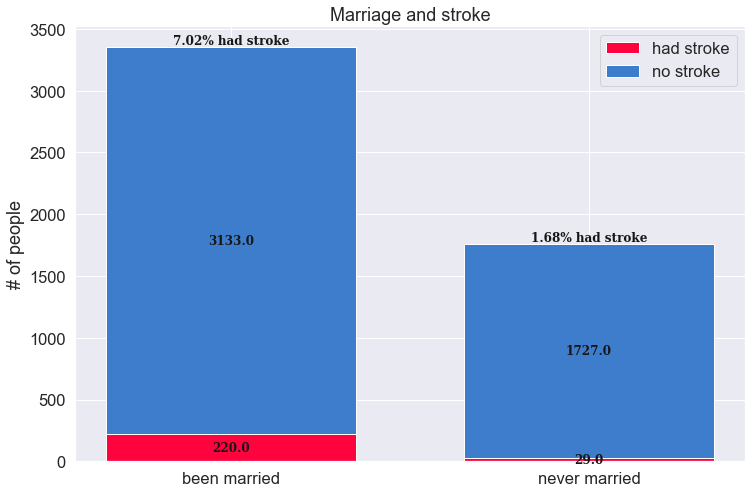

In [1113]:
stroke = stroke_data[stroke_data['stroke'] == 1]['ever_married'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['ever_married'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['been married', 'never married'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Marriage and stroke')
plt.legend()

This is surprising, but is probably a spurious assocation that has more to do with age. 

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Residence Type</h3>

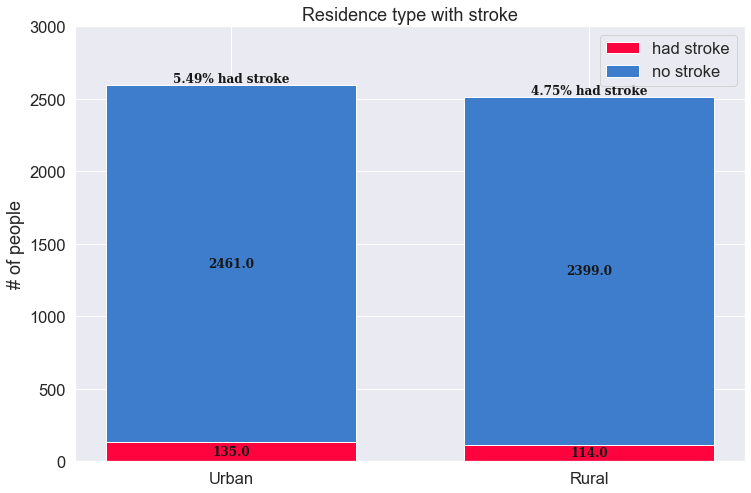

In [1114]:
stroke = stroke_data[stroke_data['stroke'] == 1]['Residence_type'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['Residence_type'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['Urban', 'Rural'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})

plt.ylim([0,3000])
plt.ylabel('# of people')
plt.title('Residence type with stroke')
plt.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Job Type</h3>

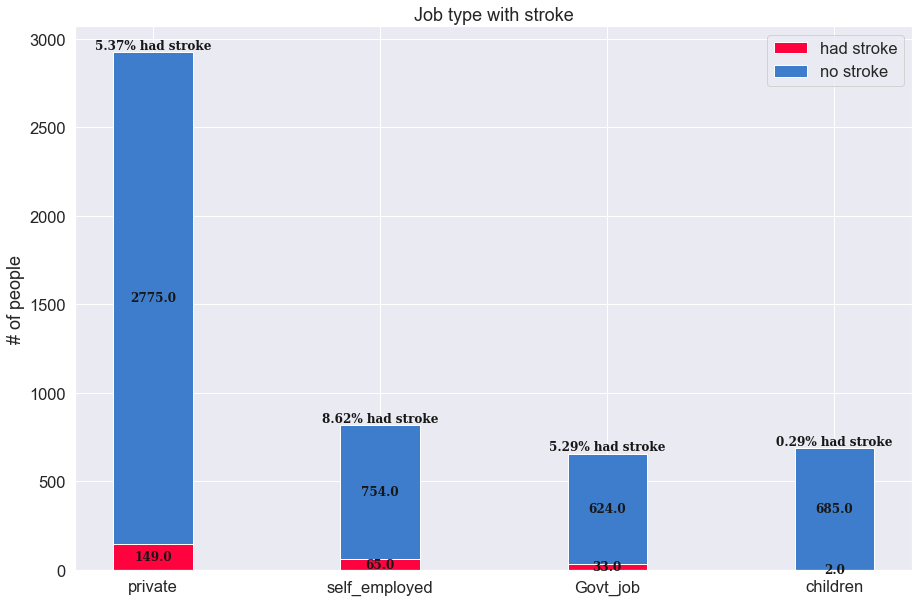

In [1115]:
stroke = stroke_data[stroke_data['stroke'] == 1]['work_type'].value_counts()
no_stroke = stroke_data[(stroke_data['stroke'] == 0) & (stroke_data['work_type'] != 'Never_worked')]['work_type'].value_counts()
stroke = stroke[['Private', 'Self-employed', 'Govt_job', 'children']]
no_stroke = no_stroke[['Private', 'Self-employed', 'Govt_job', 'children']]

x = np.arange(4)
plt.figure(figsize=[15,10])
plt.xticks(x, ['private', 'self_employed', 'Govt_job', 'children'])
plt.bar(x, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Job type with stroke')
plt.legend()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Smoking Status</h3>

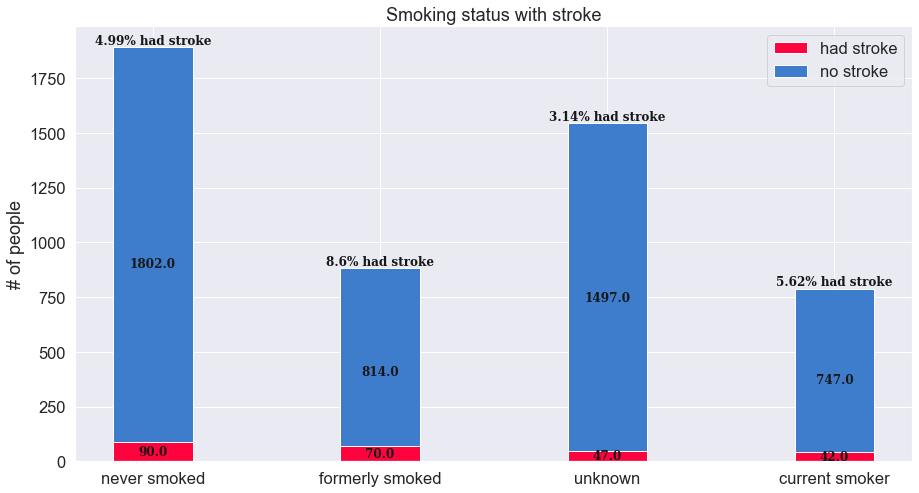

In [1116]:
stroke = stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['smoking_status'].value_counts()
stroke = stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]
no_stroke = no_stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]

x = np.arange(4)
plt.figure(figsize=[15,8])
plt.xticks(x, ['never smoked', 'formerly smoked', 'unknown', 'current smoker'])
plt.bar(x, stroke, width=0.35, label='had stroke', color='#ff033e')
plt.bar(x, no_stroke, width=0.35, label='no stroke', color='#3e7dcc', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
for xpos, ypos, yval in zip(x, no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval,{'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'center','style':'normal', 'color':'#171717'})
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', {'font': 'Serif','weight':'bold','size': '12','ha':'center', 'va':'bottom','style':'normal', 'color':'#171717'})
    
plt.ylabel('# of people')
plt.title('Smoking status with stroke')
plt.legend()

interesting that former smokers had a higher percentage of strokes than current smokers. Might be insignificant considering the low numbers though.

<a id = '2.4'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Encoding</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert gender column to a binary column where 0 is male and 1 is female</h3>

In [1117]:
conv_gen = pd.get_dummies(stroke_data['gender'])
conv_gen2 = pd.concat((conv_gen, stroke_data), axis=1)
conv_gen2 = conv_gen2.drop(['gender'], axis=1)
conv_gen2 = conv_gen2.drop(['Male'], axis=1)
stroke_bin_convert = conv_gen2.rename(columns={'Female': 'gender'})
print(stroke_bin_convert)

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046        0  67.0             0              1          Yes        Private   
51676       1  61.0             0              0          Yes  Self-employed   
31112       0  80.0             0              1          Yes        Private   
60182       1  49.0             0              0          Yes        Private   
1665        1  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234       1  80.0             1              0          Yes        Private   
44873       1  81.0             0              0          Yes  Self-employed   
19723       1  35.0             0              0          Yes  Self-employed   
37544       0  51.0             0              0          Yes        Private   
44679       1  44.0             0       

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert ever_married column to binary where Yes is 1 and No is 0</h3>

In [1118]:
conv_mar = pd.get_dummies(stroke_bin_convert['ever_married'])
conv_mar2 = pd.concat((conv_mar, stroke_bin_convert), axis=1)
conv_mar2 = conv_mar2.drop(['ever_married'], axis=1)
conv_mar2 = conv_mar2.drop(['No'], axis=1)
stroke_bin_convert = conv_mar2.rename(columns={'Yes': 'ever_married'})

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert Residence_type to binary where urban is 1 and rural is 0</h3>

In [1119]:
conv_res = pd.get_dummies(stroke_bin_convert['Residence_type'])
conv_res2 = pd.concat((conv_res, stroke_bin_convert), axis=1)
conv_res2 = conv_res2.drop(['Residence_type'], axis=1)
conv_res2 = conv_res2.drop(['Rural'], axis=1)
stroke_bin_convert = conv_res2.rename(columns={'Urban': 'Residence_type'})
stroke_bin_convert

,Residence_type,ever_married,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,1,0,67.0,0,1,Private,228.69,36.6,formerly smoked,1
51676,0,1,1,61.0,0,0,Self-employed,202.21,28.9,never smoked,1
31112,0,1,0,80.0,0,1,Private,105.92,32.5,never smoked,1
60182,1,1,1,49.0,0,0,Private,171.23,34.4,smokes,1
1665,0,1,1,79.0,1,0,Self-employed,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,1,1,80.0,1,0,Private,83.75,27.5,never smoked,0
44873,1,1,1,81.0,0,0,Self-employed,125.20,40.0,never smoked,0
19723,0,1,1,35.0,0,0,Self-employed,82.99,30.6,never smoked,0


In [1120]:
stroke_bin_convert = stroke_bin_convert[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
stroke_bin_convert

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,80.0,1,0,1,Private,1,83.75,27.5,never smoked,0
44873,1,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
19723,1,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Preparing to convert more categorical data</h3>

In [1121]:
#Create a new dataframe, `stroke_cat_convert` from `stroke_bin_convert`
stroke_cat_convert = stroke_bin_convert
#Save the index just in case
stroke_cat_index = stroke_cat_convert.index
#Save the column names (using the `columns` attribute) just in case
stroke_cat_columns = stroke_cat_convert.columns
stroke_cat_convert.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Convert work_type and smoking_status categorical data into numeric values</h3>

In [1122]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
stroke_full_convert = np.array(ct.fit_transform(stroke_cat_convert))

In [1123]:
stroke_cat_columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [1124]:
added_cols = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Unknown', 'formerly smoked', 'never smoked', 'smokes', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

In [1125]:
stroke_df = pd.DataFrame(stroke_full_convert, columns = added_cols)

In [1126]:
stroke_df

,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,61.0,0.0,0.0,1.0,0.0,202.21,28.9,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,80.0,1.0,0.0,1.0,1.0,83.75,27.5,0.0
5105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6,0.0
5107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6,0.0


<a id = '2.5'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Train Test Split</h3>

In [1127]:
X = stroke_df.iloc[:, :-1].values
y = stroke_df.iloc[:, -1].values

In [1128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id = '2.6'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Applying SMOTE technique for imbalanced classes</h3>

In [1129]:
print('Before applying SMOTE, stroke counts on y: {}'.format(sum(y_train==1)))
print('Before applying SMOTE, : non-stroke counts on y: {}'.format(sum(y_train==0)))

Before applying SMOTE, stroke counts on y: 169
Before applying SMOTE, : non-stroke counts on y: 3662


In [1130]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [1131]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After applying SMOTE, stroke counts on y: {}'.format(sum(y_train==1)))
print('After applying SMOTE, : non-stroke counts on y: {}'.format(sum(y_train==0)))

After OverSampling, the shape of train_X: (7324, 17)
After OverSampling, the shape of train_y: (7324,) 

After applying SMOTE, stroke counts on y: 3662
After applying SMOTE, : non-stroke counts on y: 3662


<a id = '2.7'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Scaling</h3>

In [1132]:
#Save the column names (using the `columns` attribute) of `stroke_scale` into the variable 'stroke_columns'
stroke_df_cols = stroke_df.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1133]:
X_train = pd.DataFrame(X_train, columns=stroke_df_cols[:-1])
X_test = pd.DataFrame(X_test, columns=stroke_df_cols[:-1])

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Verify scaling is correct with mean and std</h3>

In [1134]:
X_train.mean()

Govt_job            -6.339519e-16
Never_worked        -3.466614e-15
Private              1.398769e-15
Self-employed       -2.380401e-15
children            -1.031768e-14
Unknown              1.912027e-15
formerly smoked      1.907487e-15
never smoked        -6.352404e-16
smokes              -6.746227e-16
gender              -1.688527e-15
age                  8.563527e-16
hypertension         1.100355e-14
heart_disease        1.027517e-14
ever_married         1.223313e-14
Residence_type       1.672838e-16
avg_glucose_level    6.658640e-15
bmi                 -1.469948e-14
dtype: float64

In [1135]:
X_train.std(ddof=0)

Govt_job             1.0
Never_worked         1.0
Private              1.0
Self-employed        1.0
children             1.0
Unknown              1.0
formerly smoked      1.0
never smoked         1.0
smokes               1.0
gender               1.0
age                  1.0
hypertension         1.0
heart_disease        1.0
ever_married         1.0
Residence_type       1.0
avg_glucose_level    1.0
bmi                  1.0
dtype: float64

In [1136]:
X_train.shape

(7324, 17)

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Do we have any highly correlated values?</h3>

<AxesSubplot:>

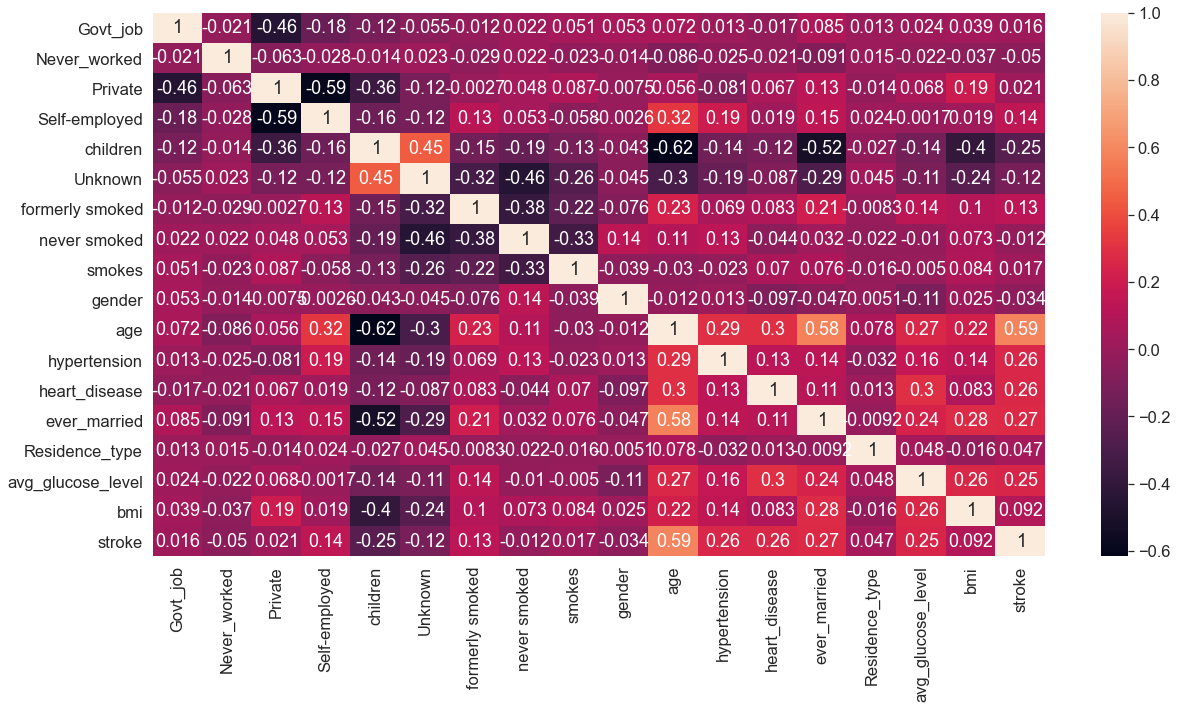

In [1137]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.assign(stroke = y_train).corr(), annot=True)
#plt.savefig('data_corr.png')

Due to having high correlations with other features, we are going to drop ever_married, Unknown (smoking status), Govt_job, private, Self-employed and children

In [1138]:
X_train = X_train.drop(['ever_married', 'Unknown', 'Govt_job', 'Private', 'Self-employed', 'children'], axis=1)
X_test = X_test.drop(['ever_married', 'Unknown', 'Govt_job', 'Private', 'Self-employed', 'children'], axis=1)

<a id = '3'></a>
<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Modeling</h1>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">We will be using the following:</h3>
XGBoost,
BernoullliNB,
GausianNB,
LogisticRegression,
DecisionTree,
RandomForest,
SVC,
KNN,
LGBMClassifier

<a id = '3.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Individual Models without Hyperparameter Tuning</h3>

In [1139]:
column_score_names = ['Model', 'Accuracy', 'K-Fold Accuracy Mean', 'Standard Deviation', 'ROC', 'Precision', 'Recall', 'F1']
model_scores = pd.DataFrame()
models = []

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">XGBoost</h3>

In [1140]:
xgboost = XGBClassifier(eval_metric='error')
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= XGBClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

xgboost_arr = pd.Series(['XGBoost',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(xgboost_arr, ignore_index=True)
print(cm)

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1183   15]
 [  78    2]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Bernoulli Naive Bayes</h3>

In [1141]:
bern = BernoulliNB()
bern.fit(X_train, y_train)

y_pred = bern.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= BernoulliNB(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

bern_arr = pd.Series(['BernoulliNB',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(bern_arr, ignore_index=True)
print(cm)

[[921 277]
 [ 25  55]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Gaussian Naive Bayes</h3>

In [1142]:
gaus = GaussianNB()
gaus.fit(X_train, y_train)

y_pred = gaus.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= GaussianNB(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

gaus_arr = pd.Series(['GaussianNB',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(gaus_arr, ignore_index=True)
print(cm)

[[ 170 1028]
 [   0   80]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Logistic Regression</h3>

In [1143]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= LogisticRegression(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lr_arr = pd.Series(['Logistic Regression',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(lr_arr, ignore_index=True)
print(cm)

[[896 302]
 [ 21  59]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">SVM</h3>

In [1144]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= SVC(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svm_arr = pd.Series(['SVM',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(svm_arr, ignore_index=True)
print(cm)

[[1125   73]
 [  62   18]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Decision Tree</h3>

In [1145]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= DecisionTreeClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

dtc_arr = pd.Series(['Decision Tree Classifier',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(dtc_arr, ignore_index=True)
print(cm)

[[1142   56]
 [  71    9]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Random Forest</h3>

In [1146]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= RandomForestClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rf_arr = pd.Series(['Random Forest Classifier',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(rf_arr, ignore_index=True)
print(cm)

[[1194    4]
 [  76    4]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">K-Nearest Neighbors</h3>

In [1147]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= KNeighborsClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

knn_arr = pd.Series(['KNeighbors Classifier',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(knn_arr, ignore_index=True)
print(cm)

[[1084  114]
 [  67   13]]


<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">LGBM Classifier</h3>

In [1148]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= LGBMClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lgbm_arr = pd.Series(['LGBM',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(lgbm_arr, ignore_index=True)
print(cm)

[[1188   10]
 [  76    4]]


<a id = '3.2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Summary Table of Performance</h3>

In [1149]:
model_scores.columns = column_score_names
model_scores = model_scores.set_index('Model')
model_scores

,Accuracy,K-Fold Accuracy Mean,Standard Deviation,ROC,Precision,Recall,F1
Model,,,,,,,
XGBoost,92.723005,96.859919,4.099127,0.506240,0.117647,0.0250,0.041237
BernoulliNB,76.369327,76.147000,0.844254,0.728141,0.165663,0.6875,0.266990
GaussianNB,19.561815,56.758686,0.517451,0.570952,0.072202,1.0000,0.134680
Logistic Regression,74.726135,78.973274,0.893324,0.742707,0.163435,0.7375,0.267574
SVM,89.436620,92.162881,1.826726,0.582033,0.197802,0.2250,0.210526
Decision Tree Classifier,90.062598,94.593390,3.202348,0.532878,0.138462,0.1125,0.124138
Random Forest Classifier,93.740219,97.201235,3.996001,0.523331,0.500000,0.0500,0.090909
KNeighbors Classifier,85.837246,93.869589,0.736098,0.533671,0.102362,0.1625,0.125604
LGBM,93.270736,96.928178,4.131285,0.520826,0.285714,0.0500,0.085106


In [1150]:
model_scores.sort_values(by='K-Fold Accuracy Mean', ascending=False)

,Accuracy,K-Fold Accuracy Mean,Standard Deviation,ROC,Precision,Recall,F1
Model,,,,,,,
Random Forest Classifier,93.740219,97.201235,3.996001,0.523331,0.500000,0.0500,0.090909
LGBM,93.270736,96.928178,4.131285,0.520826,0.285714,0.0500,0.085106
XGBoost,92.723005,96.859919,4.099127,0.506240,0.117647,0.0250,0.041237
Decision Tree Classifier,90.062598,94.593390,3.202348,0.532878,0.138462,0.1125,0.124138
KNeighbors Classifier,85.837246,93.869589,0.736098,0.533671,0.102362,0.1625,0.125604
SVM,89.436620,92.162881,1.826726,0.582033,0.197802,0.2250,0.210526
Logistic Regression,74.726135,78.973274,0.893324,0.742707,0.163435,0.7375,0.267574
BernoulliNB,76.369327,76.147000,0.844254,0.728141,0.165663,0.6875,0.266990
GaussianNB,19.561815,56.758686,0.517451,0.570952,0.072202,1.0000,0.134680


In [1151]:
model_scores.sort_values(by='Recall', ascending=False)

,Accuracy,K-Fold Accuracy Mean,Standard Deviation,ROC,Precision,Recall,F1
Model,,,,,,,
GaussianNB,19.561815,56.758686,0.517451,0.570952,0.072202,1.0000,0.134680
Logistic Regression,74.726135,78.973274,0.893324,0.742707,0.163435,0.7375,0.267574
BernoulliNB,76.369327,76.147000,0.844254,0.728141,0.165663,0.6875,0.266990
SVM,89.436620,92.162881,1.826726,0.582033,0.197802,0.2250,0.210526
KNeighbors Classifier,85.837246,93.869589,0.736098,0.533671,0.102362,0.1625,0.125604
Decision Tree Classifier,90.062598,94.593390,3.202348,0.532878,0.138462,0.1125,0.124138
Random Forest Classifier,93.740219,97.201235,3.996001,0.523331,0.500000,0.0500,0.090909
LGBM,93.270736,96.928178,4.131285,0.520826,0.285714,0.0500,0.085106
XGBoost,92.723005,96.859919,4.099127,0.506240,0.117647,0.0250,0.041237


We can see that Random Forest, LGBM and XGBoost got excellent accuracy scores. However, for our purposes we also want to consider recall because it is better to have more true positives of stroke risk, even with the tradeoff of more false positives. So we might look for a model that has a good balance. Perhaps we want to consider GaussianNB, Bernoulli NB, Logistic Regression.

<a id = '3.3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Hyperparameter Tuning</h3>

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Focus on Accuracy</h3>

In [ ]:
GridSearch_col_names = ['Model', 'Best Accuracy', 'Best Parameters']
GridSearch_acc = pd.DataFrame()

gridsearch_models = [('XGBClassifier', XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
        ('BernoulliNB', BernoulliNB(), [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]),
        ('GaussianNB', GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)}]),
        ('Logistic Regression', LogisticRegression(), [{'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}]),
        ('SVM', SVC(), [{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf']}]),
        ('Decision Tree Classifier', DecisionTreeClassifier(), [{'criterion':['gini','entropy']}]),
        ('Random Forest Classifier', RandomForestClassifier(), [{'n_estimators':[80,100,150,200,300, 500],'criterion': ['gini','entropy']}]),
        ('KNeighbors Classifier', KNeighborsClassifier(), [{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
        ('LGBM Classifier', LGBMClassifier(), [{'n_estimators':range(200, 600, 80), 'num_leaves':range(20,60,10)}])
       ]

for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'accuracy', cv=5)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    model_w_scores = pd.Series([j, best_accuracy * 100, best_param])
    GridSearch_acc = GridSearch_acc.append(model_w_scores, ignore_index=True)
GridSearch_acc.columns = GridSearch_col_names
GridSearch_acc = GridSearch_acc.set_index('Model')
GridSearch_acc

In [ ]:
GridSearch_acc.sort_values(by='Best Accuracy', ascending=False)

In [ ]:
GridSearch_col_names = ['Model', 'Best Accuracy', 'Best Parameters']
GridSearch_rfc = pd.DataFrame()

gridsearch_models = [('Random Forest Classifier', RandomForestClassifier(),
                      [{'n_estimators':[80,100,150,200,300, 1000],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': ['auto', 'sqrt'],
                        'bootstrap': [True, False],
                        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                        'criterion':['gini','entropy']}])]

for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'accuracy', cv=5)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    model_w_scores = pd.Series([j, best_accuracy * 100, best_param])
    GridSearch_rfc = GridSearch_rfc.append(model_w_scores, ignore_index=True)
GridSearch_rfc.columns = GridSearch_col_names
GridSearch_rfc = GridSearch_rfc.set_index('Model')
GridSearch_rfc

For accuracy, the best score we get is 97.3 % from the Random Forest Classifier. However, for the purposes of trying to predict stroke, we might want to focus on recall instead of accuracy because it is more important to catch the true positives. We will explore this below.

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Focus on Recall</h3>

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">We shall focus on Bernoulli NB, Gaussian NB and Logistic Regression because they had the highest recall</h3>

In [ ]:
GridSearch_recall_cols = ['Model', 'Best recall score', 'Best Parameters']
GridSearch_recall = pd.DataFrame()

gridsearch_models = [
        ('BernoulliNB', BernoulliNB(), [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]),
        ('GaussianNB', GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)}]),
        ('Logistic Regression', LogisticRegression(), [{'penalty': ['none','l1','l2', 'elasticnet'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'], 'C': [0.001,0.01,0.1,1,10,100]}]),
       ]


# add STD, precision, recall, and F1
for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'recall', cv=5)
    grid.fit(X_train, y_train)
    best_recall = grid.best_score_
    best_param = grid.best_params_
    
    model_w_scores = pd.Series([j, best_recall, best_param])
    GridSearch_recall = GridSearch_recall.append(model_w_scores, ignore_index=True)
GridSearch_recall.columns = GridSearch_recall_cols
GridSearch_recall = GridSearch_recall.set_index('Model')

In [ ]:
GridSearch_recall.sort_values(by='Best recall score', ascending=False)

In [ ]:
GridSearch_recall[GridSearch_recall.index == 'Logistic Regression']['Best Parameters'][0]

<a id = '4'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Final Models</h1>

<a id = '4.1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Model Tuned for Accuracy</h3>

In [1193]:
#for visualizations
font_1 = {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#fc0fc0'}
font_circle = {'font':'Serif', 'size':'16','color': 'black', 'weight':'bold'}
circle_color = '#fc0fc0'
ax_background_color = '#c5c6d0'
heatmap_color = ListedColormap([ax_background_color])
titles_font = {'font': 'Serif', 'size': '18','weight':'bold', 'color':'black'}
hot_pink_color = '#fc0fc0'
purple_color = '#3500d3'

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Random Forest</h3>

In [1171]:
# to save scores as rounded numbers
def normal_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

ranfor = RandomForestClassifier(bootstrap= True,
 criterion= 'gini',
 max_depth= 70,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 n_estimators= 200)
ranfor.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)
y_prob = ranfor.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
cm_ranfor = confusion_matrix(y_test, y_pred)
class_rep_ranfor = classification_report(y_test, y_pred)

#variables to save for summary
rf_accuracy = normal_round(accuracy_score(y_test, y_pred) * 100)
rf_recall = normal_round(recall_score(y_test, y_pred) * 100)
rf_precision = normal_round(precision_score(y_test, y_pred) * 100)
rf_f1 = normal_round(f1_score(y_test, y_pred) * 100)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1198
         1.0       0.25      0.03      0.05        80

    accuracy                           0.93      1278
   macro avg       0.59      0.51      0.51      1278
weighted avg       0.90      0.93      0.91      1278

ROC AUC score: 0.7891694490818031
Accuracy Score:  0.9342723004694836


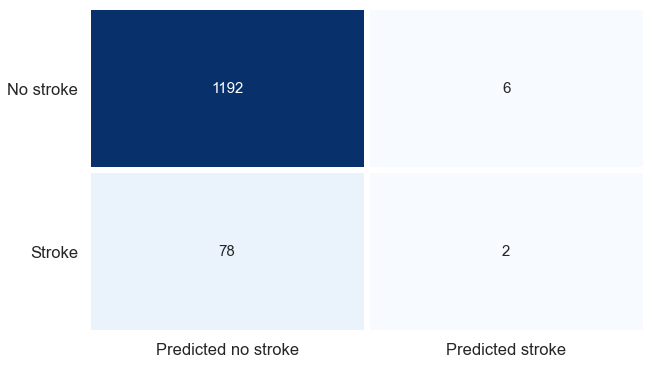

In [1172]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

We focused on accuracy here, but it should be fairly easy to see that this is not a good predictor of stroke with only 4 true positives and 76 false negatives. 

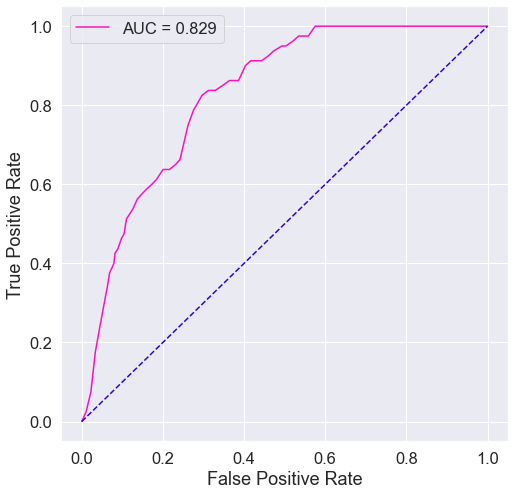

In [1194]:
# ROC AUC Curve
rf_false_positive_rate, rf_true_positive_rate, thresholds = roc_curve(y_test, y_prob)
#use this variable for summary plotting
rf_roc_auc = auc(rf_false_positive_rate, rf_true_positive_rate)


plt.figure(figsize = (8, 8))
plt.plot(rf_false_positive_rate,rf_true_positive_rate, color = hot_pink_color, label = 'AUC = %0.3f' % rf_roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = purple_color)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Importance</h3>

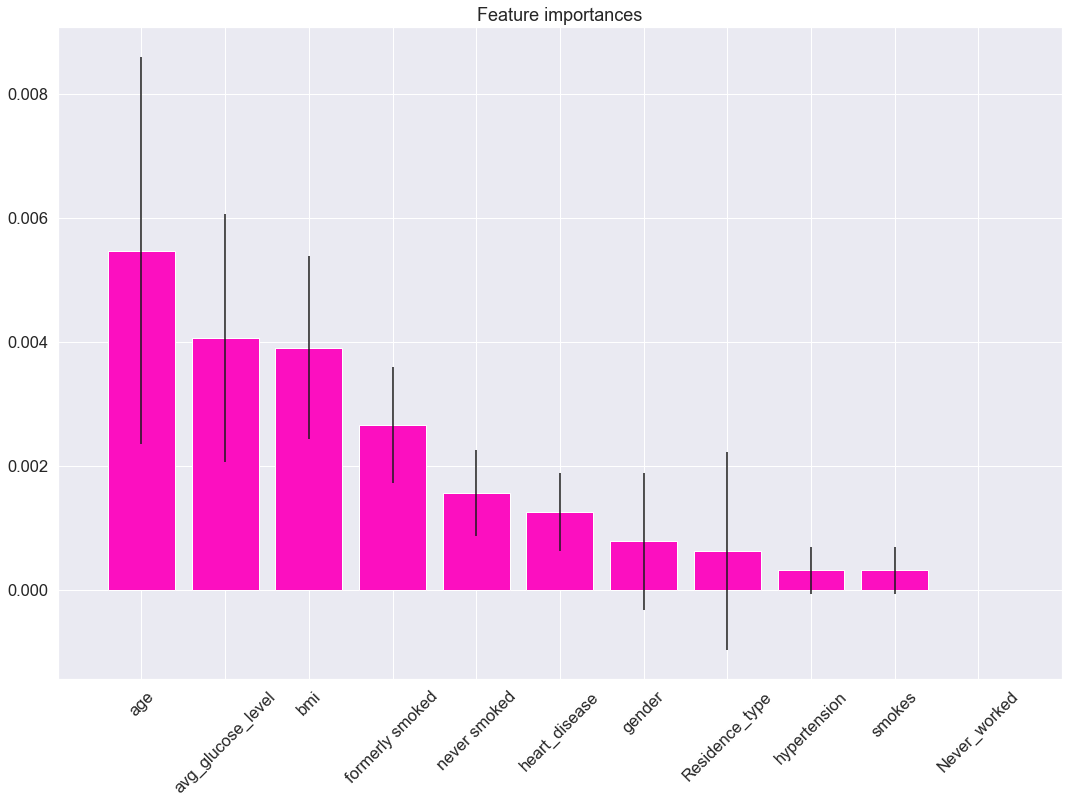

In [1190]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
features = stroke_df.drop(['ever_married', 'Unknown', 'Govt_job', 'Private', 'Self-employed', 'children', 'stroke'], axis=1).columns

rf_imps = permutation_importance(rf_model, X_test, y_test)
rf_importances = rf_imps.importances_mean
rf_std = rf_imps.importances_std
rf_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), rf_importances[rf_indices], color=hot_pink_color, yerr=rf_std[rf_indices], align="center")
plt.xticks(range(11), [features[rf_indices[i]] for i in range(11)], rotation=45)
plt.xlim([-1, X_test.shape[1]])
plt.grid(True)
#plt.savefig('other_feature_imp.png')
plt.show()

<a id = '4.2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Models Tuned to Best Recall</h3>

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Bernoulli NB</h3>

In [1175]:
bern = BernoulliNB(alpha=0.01)
bern.fit(X_train, y_train)
y_pred = bern.predict(X_test)
y_prob = bern.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86      1198
         1.0       0.17      0.69      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.73      0.56      1278
weighted avg       0.92      0.76      0.82      1278

ROC AUC score: 0.8059578464106844
Accuracy Score:  0.7629107981220657


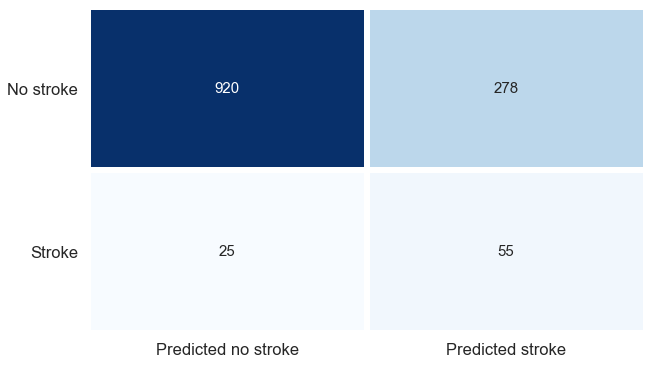

In [1176]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

This is much better at predicting stroke (i.e. catching the true positives) than the high accuracy random forest model.

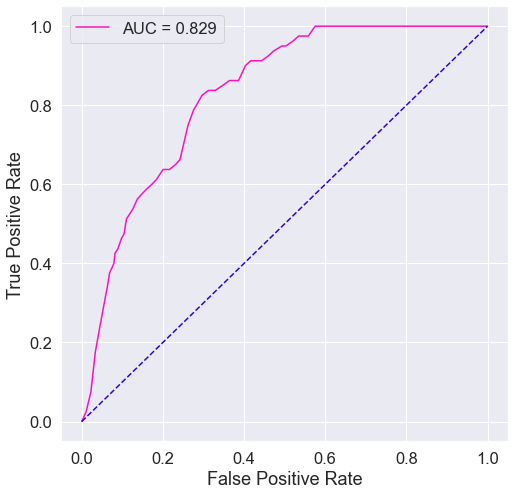

In [1195]:
# ROC AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = hot_pink_color, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = purple_color)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Importance</h3>

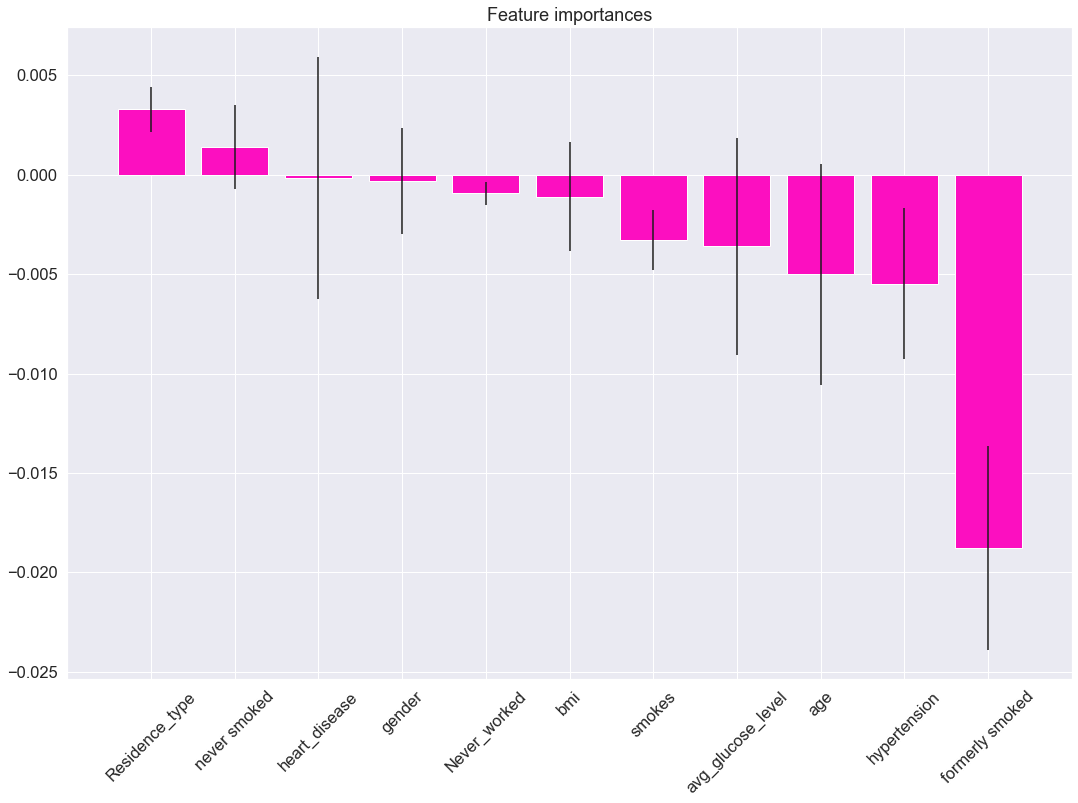

In [1192]:
imps = permutation_importance(bern, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color=hot_pink_color, yerr=std[indices], align="center")
plt.xticks(range(11), [features[indices[i]] for i in range(11)], rotation=45)
plt.xlim([-1, X_test.shape[1]])
plt.grid(True)
plt.show()

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Gaussian NB</h3>

In [1179]:
gauss = GaussianNB(var_smoothing= 1.2328467394420635e-09)
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
y_prob = gauss.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26      1198
         1.0       0.07      1.00      0.14        80

    accuracy                           0.20      1278
   macro avg       0.54      0.57      0.20      1278
weighted avg       0.94      0.20      0.25      1278

ROC AUC score: 0.8139816360601002
Accuracy Score:  0.20031298904538342


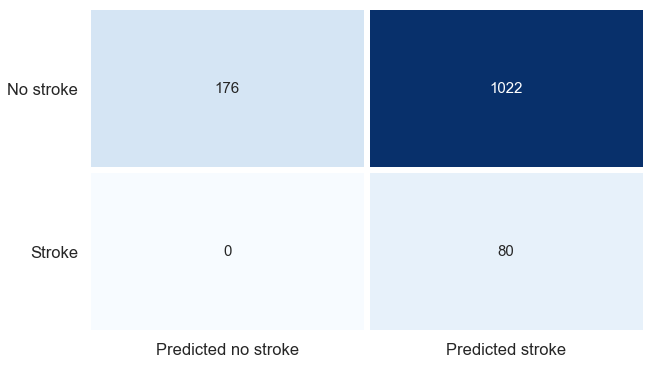

In [1180]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

While we did predict 100% of strokes, we also misclassified 1022. This probably isn't a particularly useful model if it's classifying nearly everyone as stroke risk. 

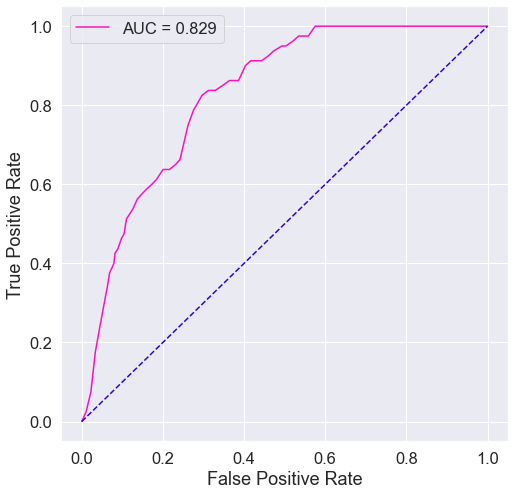

In [1196]:
# ROC AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = hot_pink_color, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = purple_color)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Importance</h3>

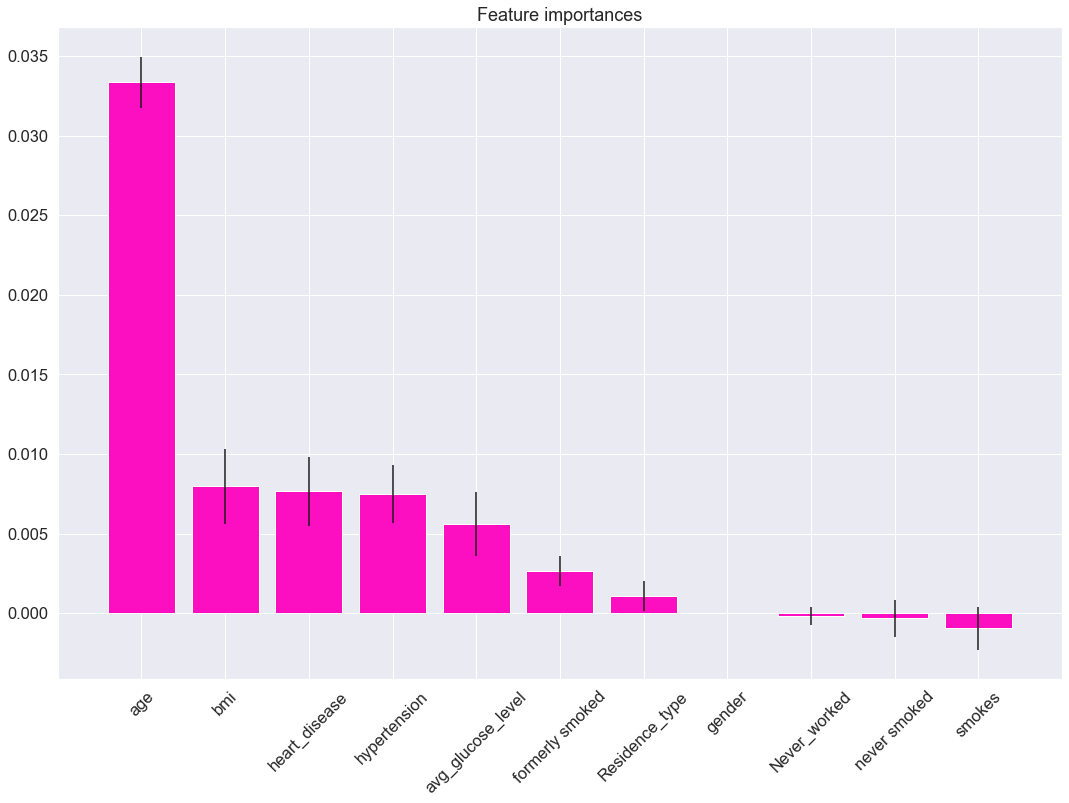

In [1197]:
imps = permutation_importance(gauss, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color=hot_pink_color, yerr=std[indices], align="center")
plt.xticks(range(11), [features[indices[i]] for i in range(11)], rotation=45)
plt.xlim([-1, X_test.shape[1]])
plt.grid(True)
plt.show()

<h3 style = "font-family:garamond; font-size:25px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Logistic Regression</h3>

In [1183]:
logreg = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]
cm_lr = confusion_matrix(y_test, y_pred)

# variables for scores for summary
lr_accuracy = normal_round(accuracy_score(y_test, y_pred) * 100)
lr_recall = normal_round(recall_score(y_test, y_pred) * 100)
lr_precision = normal_round(precision_score(y_test, y_pred) * 100)
lr_f1 = normal_round(f1_score(y_test, y_pred) * 100)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      1198
         1.0       0.15      0.84      0.26        80

    accuracy                           0.70      1278
   macro avg       0.57      0.76      0.53      1278
weighted avg       0.93      0.70      0.78      1278

ROC AUC score: 0.8287093071786311
Accuracy Score:  0.6971830985915493


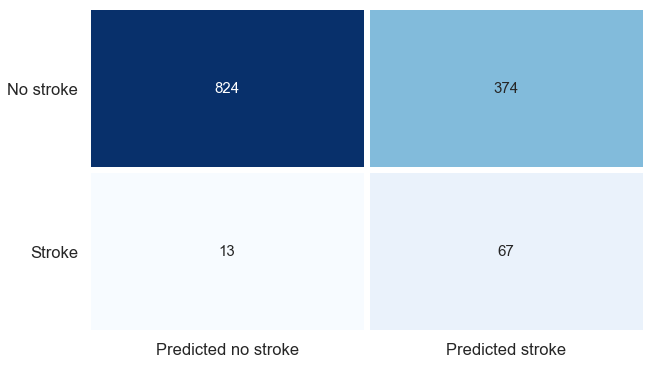

In [1184]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_lr, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

Easily our best model for predicting stroke. 

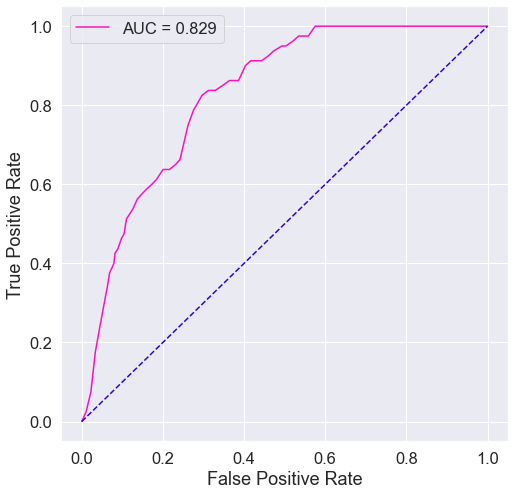

In [1198]:
# ROC AUC Curve
lr_false_positive_rate, lr_true_positive_rate, thresholds = roc_curve(y_test, y_prob)
lr_roc_auc = auc(lr_false_positive_rate, lr_true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(lr_false_positive_rate, lr_true_positive_rate, color = hot_pink_color, label = 'AUC = %0.3f' % lr_roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = purple_color)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

<h3 style = "font-family:garamond; font-size:20px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Feature Importance</h3>

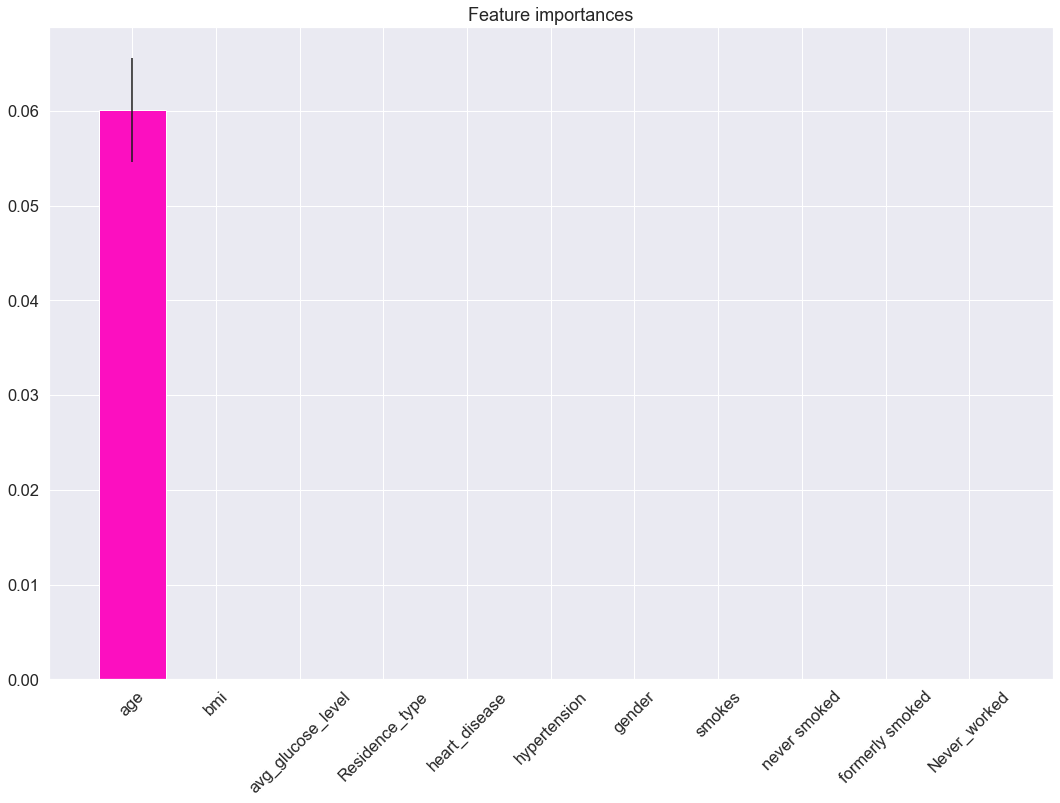

In [1191]:
lr_imps = permutation_importance(logreg, X_test, y_test)
lr_importances = lr_imps.importances_mean
lr_std = lr_imps.importances_std
lr_indices = np.argsort(lr_importances)[::-1]

plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), lr_importances[lr_indices], color=hot_pink_color, yerr=lr_std[lr_indices], align="center")
plt.xticks(range(11), [features[lr_indices[i]] for i in range(11)], rotation=45)
plt.xlim([-1, X_test.shape[1]])
plt.grid(True)
plt.show()

<a id = '5'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Summary</h1>

Text(0.125, -0.055, 'Although our Random Forest model got a high accuracy score, it performed \nvery poorly on the goal of predicting stroke, which for our purposes would \nfocus on recall. However, it is interesting to see which features this model found most useful. It seems it was mostly the \nhealth indicators rather than the sociodemographics, but as the lines indicate, there is a wide margin of error. It might \nstill be useful in building future models.')

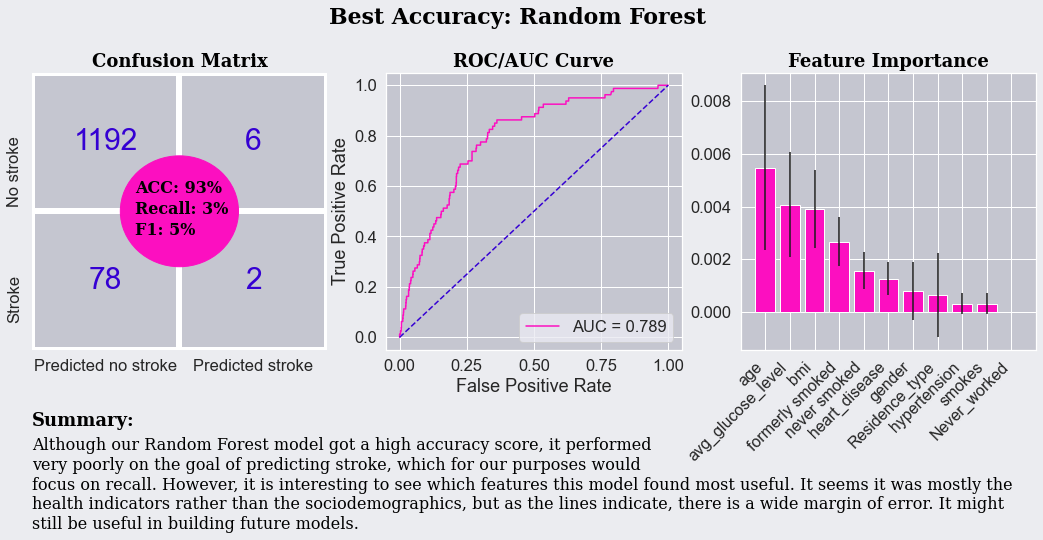

In [1187]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
fig.suptitle('Best Accuracy: Random Forest', font = 'Serif', weight='bold', color='black', size=22)
fig.patch.set_facecolor('#ebecf0')

#Random Forest Confusion Matrix
ax[0].set_title('Confusion Matrix', titles_font)
ax[0].set_position([0.125, 0.3, 0.22794117647058826, 0.55])
sns.heatmap(ax=ax[0], data=cm_ranfor, cmap=heatmap_color, annot=True, fmt = 'd',
            linewidths = 5, cbar = False, annot_kws = {'fontsize': 30, 'color': '#3500d3' }, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
circle = matplotlib.patches.Circle((1, 1), radius=.4, color=circle_color)
sns.set(font_scale=1.5)
ax[0].add_patch(circle)
ax[0].text(.70, .87, 'ACC: ' + str(rf_accuracy) + '%', font_circle)
ax[0].text(.70, 1.02, 'Recall: ' + str(rf_recall) + '%', font_circle)
ax[0].text(.70, 1.17, 'F1: ' + str(rf_f1) + '%', font_circle)

# Random Forest ROC/AUC Curve
ax[1].set_title('ROC/AUC Curve', titles_font)
ax[1].set_position([0.3985294117647059, 0.3, 0.2279411764705882, 0.55])

ax[1].plot(rf_false_positive_rate,rf_true_positive_rate, color = hot_pink_color, label = 'AUC = %0.3f' % rf_roc_auc)
ax[1].set_facecolor(ax_background_color)
ax[1].plot([0, 1], [0, 1], linestyle = '--', color = purple_color)
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

# Random Forest Feature Importance
ax[2].set_title('Feature Importance', titles_font)
ax[2].set_position([0.6720588235294118, 0.3, 0.2279411764705883, 0.55])
ax[2].bar(range(X_test.shape[1]), rf_importances[rf_indices], color=hot_pink_color, yerr=rf_std[rf_indices], align='center')
ax[2].set_facecolor(ax_background_color)
ax[2].set_xticks(range(11))
ax[2].set_xticklabels([features[rf_indices[i]] for i in range(11)], rotation=45, ha='right', fontsize=16)
ax[2].set_xlim([-1, X_test.shape[1]])
ax[2].grid(True)

fig.text(0.125, 0.15, 'Summary:',
         {'font':'Serif', 'size':18,'weight':'bold' ,'color':'black'})
fig.text(0.125, -0.055, 'Although our Random Forest model got a high accuracy score, it performed \nvery poorly on the goal of predicting stroke, which for our purposes would \nfocus on recall. However, it is interesting to see which features this model found most useful. It seems it was mostly the \nhealth indicators rather than the sociodemographics, but as the lines indicate, there is a wide margin of error. It might \nstill be useful in building future models.',
         {'font':'Serif', 'size':16,'weight':'normal' ,'color':'black'})

Text(0.125, -0.055, 'We can see here that our model did very well at predicting stroke. Of the\n80 true stroke victims, our model predicted 67 correctly. Of the 1198 who \ndid not have a stroke, we correcly predicted 824 of them. Unfortunately, it seems the model simply learned that age was\nthe only important feature. It is surprising to see how useful age alone is in predicting stroke on our dataset. However, \nit would be interesting to see how the model performs without age.')

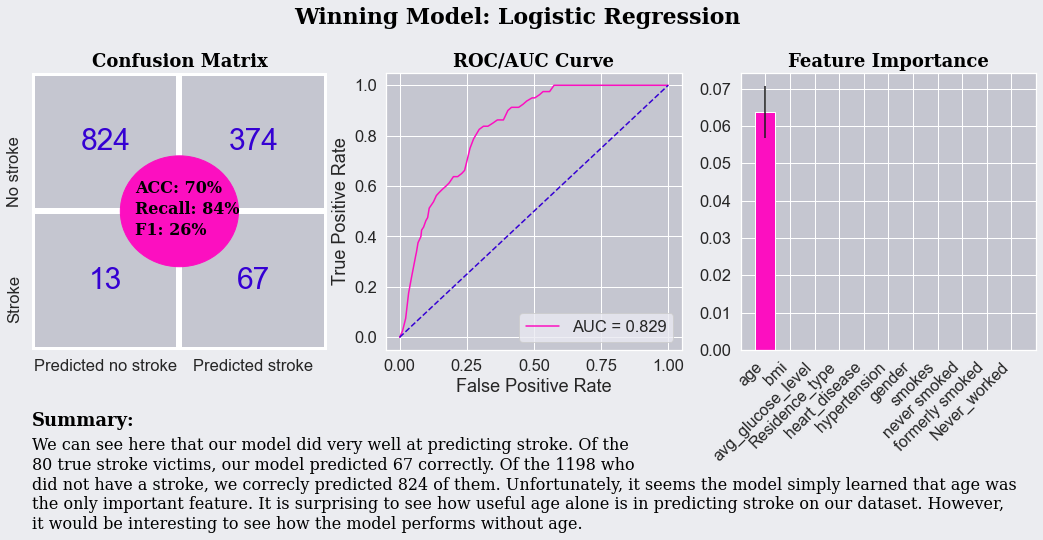

In [1188]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
fig.suptitle('Winning Model: Logistic Regression', font = 'Serif', weight='bold', color='black', size=22)
fig.patch.set_facecolor('#ebecf0')

# Logistic Regression CM
ax[0].set_title('Confusion Matrix', titles_font)
ax[0].set_position([0.125, 0.3, 0.22794117647058826, 0.55])
sns.heatmap(ax=ax[0], data=cm_lr, cmap=heatmap_color, annot=True, fmt = 'd',
            linewidths = 5, cbar = False, annot_kws = {'fontsize': 30, 'color': '#3500d3' }, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
circle = matplotlib.patches.Circle((1, 1), radius=.4, color=circle_color)
sns.set(font_scale=1.5)
ax[0].add_patch(circle)
ax[0].text(.70, .87, 'ACC: ' + str(lr_accuracy) + '%', font_circle)
ax[0].text(.70, 1.02, 'Recall: ' + str(lr_recall) + '%', font_circle)
ax[0].text(.70, 1.17, 'F1: ' + str(lr_f1) + '%', font_circle)

# Logistic Regression ROC/AUC Curve
ax[1].set_title('ROC/AUC Curve', titles_font)
ax[1].set_position([0.3985294117647059, 0.3, 0.2279411764705882, 0.55])
ax[1].plot(lr_false_positive_rate, lr_true_positive_rate, color = hot_pink_color, label = 'AUC = %0.3f' % lr_roc_auc)
ax[1].set_facecolor(ax_background_color)
ax[1].plot([0, 1], [0, 1], linestyle = '--', color = purple_color)
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].legend()

#Logistic Regression Feature Importance
ax[2].set_title('Feature Importance', titles_font)
ax[2].set_position([0.6720588235294118, 0.3, 0.2279411764705883, 0.55])
ax[2].bar(range(X_test.shape[1]), lr_importances[lr_indices], color=hot_pink_color, yerr=lr_std[lr_indices], align='center')
ax[2].set_facecolor(ax_background_color)
ax[2].set_xticks(range(11))
ax[2].set_xticklabels([features[lr_indices[i]] for i in range(11)], rotation=45, ha='right', fontsize=16)
ax[2].set_xlim([-1, X_test.shape[1]])
ax[2].grid(True)

fig.text(0.125, 0.15, 'Summary:',
         {'font':'Serif', 'size':18,'weight':'bold' ,'color':'black'})
fig.text(0.125, -0.055, 'We can see here that our model did very well at predicting stroke. Of the\n80 true stroke victims, our model predicted 67 correctly. Of the 1198 who \ndid not have a stroke, we correcly predicted 824 of them. Unfortunately, it seems the model simply learned that age was\nthe only important feature. It is surprising to see how useful age alone is in predicting stroke on our dataset. However, \nit would be interesting to see how the model performs without age.',
         {'font':'Serif', 'size':16,'weight':'normal' ,'color':'black'})


C:\Users\rotzn\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")
<ipython-input-1189-e9f616d98e5d>:64: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fig.text(0.9,0.72, 'Correct ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':purple_color})
<ipython-input-1189-e9f616d98e5d>:66: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fig.text(1.04,0.72, 'Incorrect', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':hot_pink_color},alpha = 1)
<ipython-input-1189-e9f616d98e5d>:69: UserWarning: Matplotlib is currently using module://i

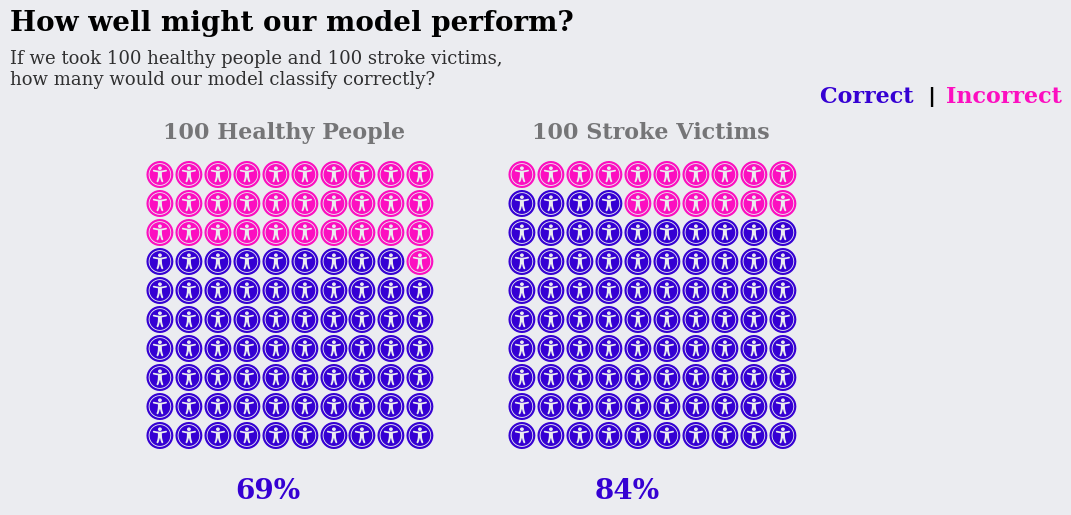

In [1189]:
yes = 100
no =  100
false_neg = 16
false_pos = 31
true_pos = 84
true_neg= 69

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (9,9),
                 facecolor = '#ebecf0',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':10,
                           'columns': 10,
                           'values' : [false_pos,true_neg],
                            'colors' : [hot_pink_color,purple_color],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'universal-access',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 10,
                            'columns':10,
                            'values':[false_neg,true_pos],         
                              'colors' : [hot_pink_color,purple_color],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'universal-access',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'How well might our model perform?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.74, 'If we took 100 healthy people and 100 stroke victims,\nhow many would our model classify correctly?', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
#can add text below
fig.text(0.24, 0.22, '', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'})
fig.text(0.65, 0.22, '', {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'})

fig.text(0.25, 0.28, '{}%'.format(true_neg), {'font':'Serif', 'size':20,'weight':'bold' , 'color':purple_color}, alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(true_pos), {'font':'Serif', 'size':20,'weight':'bold', 'color':purple_color}, alpha = 1)
fig.text(0.17, 0.68, '100 Healthy People'.format(yes_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.58, 0.68, "100 Stroke Victims", {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)


fig.text(0.9,0.72, 'Correct ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':purple_color})
fig.text(1.02,0.72, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.72, 'Incorrect', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':hot_pink_color},alpha = 1)


fig.show()